In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

# Simple Usage

In [2]:
import sys
sys.path.append('../')
from CEmulator.Emulator import XihmMassBin_CEmulator
csstemu = XihmMassBin_CEmulator(verbose=True)

Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the XihmNL emulator...
Using 65 training samples.
Loading the PkhmNL emulator...
Using 65 training samples.


In [3]:
%%time
csstemu.set_cosmos(Omegac=0.25, As=2e-9)
rlist = np.logspace(-2, 2.5, 1000)
zlist = np.array([0.55])
xihmMassbin = csstemu.get_xihmMassBin(z=zlist, r=rlist)
print(xihmMassbin.shape)

(7, 1, 1000)
CPU times: user 28.7 ms, sys: 2.11 ms, total: 30.8 ms
Wall time: 29.6 ms


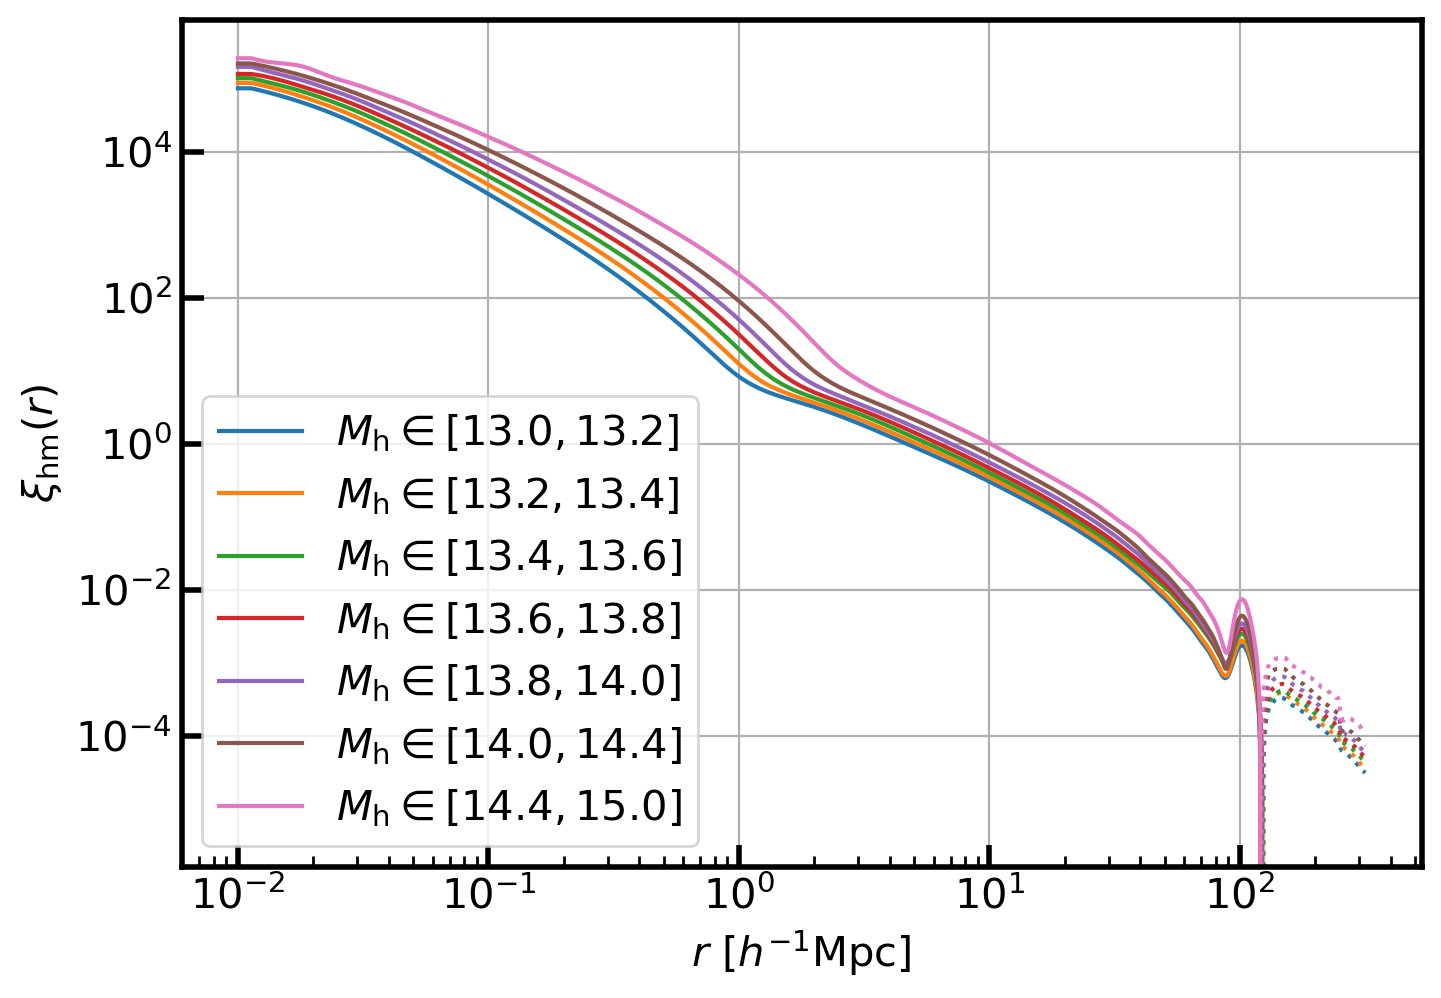

In [4]:
massedges = np.array([13.0, 13.2, 13.4, 13.6, 13.8, 14.0, 14.4, 15.0])
nmassbin  = len(massedges) - 1
with plt.style.context('article'):
    for im in range(nmassbin):
        l1, = plt.plot(rlist,  xihmMassbin[im, 0], label=r'$M_{\rm h}\in [%.1f, %.1f]$'%(massedges[im], massedges[im+1]))
        l2, = plt.plot(rlist, -xihmMassbin[im, 0], ls=':', color=l1.get_color())
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\xi_{\rm hm}(r)$')
    plt.xlabel(r'$r\ [h^{-1}{\rm Mpc}]$')